# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset compiles data from 100,000 medical appointments in Brazil, focusing on the pivotal question of patient attendance. Each entry encompasses various patient attributes. 

> The 'ScheduledDay' feature denotes the date when the patient scheduled their appointment. Meanwhile, 'Neighborhood' specifies the hospital's location. Additionally, 'Scholarship' indicates enrollment in the Brazilian welfare program Bolsa Família. It's essential to note the peculiar encoding of the final column: 'No' signifies attendance, while 'Yes' denotes absence. 


### Question(s) for Analysis

Q1: What is the distribution of appointment show-up vs. no show-up based on the day of the week the appointment was scheduled?

Q2: How does the geographic distribution of neighborhoods impact the likelihood of patients showing up for their appointments?

Q3: Is age a reliable factor for predicting whether a patient will attend their scheduled appointment?


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# read the dataset
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Displaying the number of samples (rows) and columns in the DataFrame.
df.shape

(110527, 14)

In [6]:
# check for duplicates - there are none
df.duplicated().sum()

0

In [7]:
# how many different patients exist in the dataset
df.PatientId.nunique()

62299

In [8]:
# check that AppointmentID is a unique row identifier
df.AppointmentID.nunique()

110527

In [9]:
# columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

ScheduledDay and AppointmentDay should be converted to datetime data type rather than being represented as strings.

In [10]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

All columns are devoid of missing values.

In [11]:
# Displaying a summary statistics for all columns in the DataFrame, including categorical variables.
df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In this dataset, the average age is 37, with the highest age recorded as 115. However, there is a discrepancy with the minimum age being -1, indicating an issue that needs to be addressed later.


### Data Cleaning


### Remove unnecessary columns


In [12]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.shape

(110527, 12)


### Correct data types


In [13]:
# Convert string to datetime and retain only the date part
columns = ['ScheduledDay', 'AppointmentDay']
for column in columns:
    df[column] = pd.to_datetime(pd.to_datetime(df[column]).dt.date)

print(df.dtypes)
df.head(3)


Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No



### Address incorrect data


In [14]:
# Identify rows where age is negative
mask = df.query('Age == "-1"')
mask

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# Remove rows with negative age
df.drop(index=99832, inplace=True)
# Check again for negative age
df.query('Age < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show



The subsequent check validates that there are no more negative age values in the DataFrame.


In [16]:
# correction of columns name
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'No-show':'no_show'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Update column values



In [17]:
# Display the value counts of the 'No_show' column
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

We currently have two values, "No" and "Yes". I will change them to "0" and "1", respectively.

In [18]:
# Change 'Yes' to 1 and 'No' to 0 in the 'no_show' column
df.no_show = np.where(df.no_show == "Yes", 1, 0)

# Confirm the value counts after the change
df.no_show.value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: What is the distribution of appointment show-up vs. no show-up based on the day of the week the appointment was scheduled?

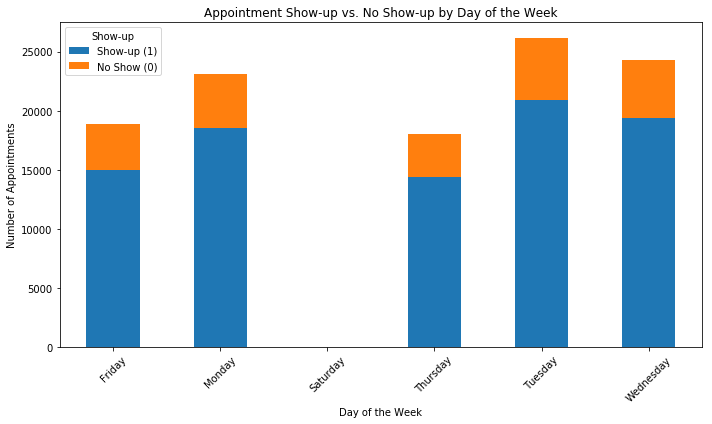

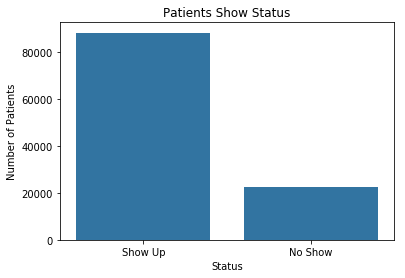

In [19]:

def plot_appointment_distribution(df):
    # Convert 'ScheduledDay' to datetime and extract the day of the week
    df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
    df['DayOfWeek'] = df['ScheduledDay'].dt.day_name()

    # Group data by day of the week and count show-up vs. no show-up appointments
    distribution = df.groupby(['DayOfWeek', 'no_show']).size().unstack()

    # Plot the distribution
    distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Appointment Show-up vs. No Show-up by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Appointments')
    plt.xticks(rotation=45)
    plt.legend(title='Show-up', labels=['Show-up (1)', 'No Show (0)'])
    plt.tight_layout()
    plt.show()

def plot_patient_status(df):
    # Plot a bar chart
    base_color = sns.color_palette()[0]
    sns.countplot(data=df, x='no_show', color=base_color)
    plt.title('Patients Show Status')
    plt.xticks([0, 1], ['Show Up', 'No Show'])
    plt.xlabel('Status')
    plt.ylabel('Number of Patients')
    plt.show()

# Call the functions with the DataFrame 'df'
plot_appointment_distribution(df)
plot_patient_status(df)

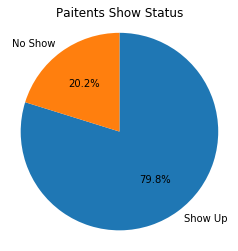

In [24]:
# plot a pie chart
sorted_counts = df.no_show.value_counts()
plt.pie(sorted_counts, labels = ['Show Up', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Status');

>"An overwhelming majority of patients (79.8%) honored their appointments. Interestingly, Saturdays had no scheduled appointments. Among the weekdays, Thursdays exhibited the lowest show-up rate, whereas Tuesdays boasted the highest attendance."

### Q2: How does the geographic distribution of neighborhoods impact the likelihood of patients showing up for their appointments?

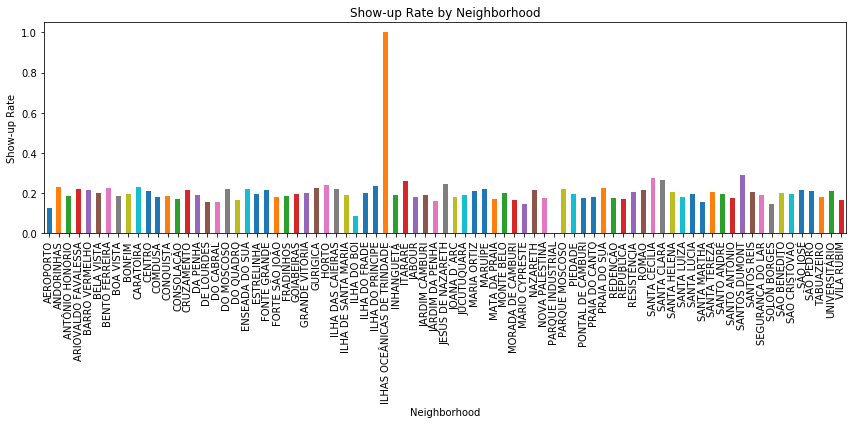

In [26]:
# Group data by neighborhood and calculate the mean of the 'no_show' column for each group
neighborhood_stats = df.groupby('Neighbourhood')['no_show'].mean()

# Plot the show-up rate by neighborhood
plt.figure(figsize=(12, 6))
neighborhood_stats.plot(kind='bar')
plt.title('Show-up Rate by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Show-up Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

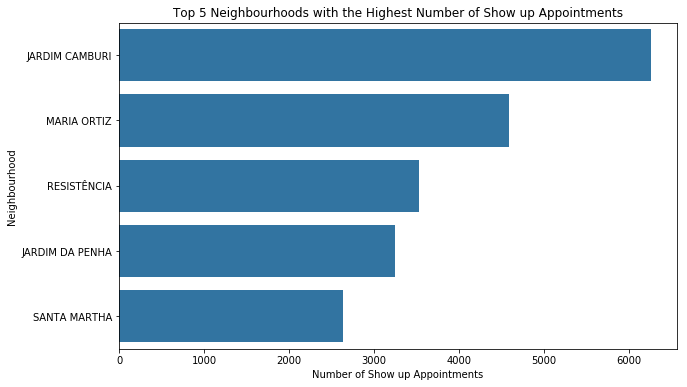

In [97]:
# Filter the DataFrame for no-show appointments
df_no_show = df[df['no_show'] == 0]

# Plot a horizontal bar chart
plt.figure(figsize=[10, 6])
sns.countplot(data=df_no_show, y='Neighbourhood', color=base_color, order=df_no_show['Neighbourhood'].value_counts().head().index)
plt.title('Top 5 Neighbourhoods with the Highest Number of Show up Appointments')
plt.xlabel('Number of Show up Appointments')
plt.ylabel('Neighbourhood')
plt.show()


> The chart reveals that the JARDIM CAMBURI neighborhood recorded the highest number of attended appointments, closely followed by MARIA ORTIZ.

### Q3: Is age a reliable factor for predicting whether a patient will attend their scheduled appointment?

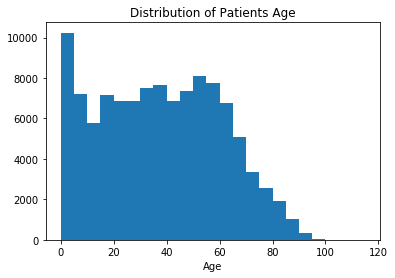

In [102]:
# plot a histogram 
bin_edges = np.arange(0, df['Age'].max()+5, 5)
plt.hist(data = df, x = 'Age', bins = bin_edges)
plt.xlabel('Age')
plt.title('Distribution of Patients Age');

In [104]:
# age_group (classify age to 4 groups)
# view the min, 25%, 50%, 75%, max age values
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [106]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 18, 37, 55, 115]
# labels for the four age groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], bin_edges, labels=bin_names)
# insert a new column (age_group) before column 7
df.insert(7, 'age_group', age_group)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,age_group,Diabetes,Alcoholism,Handicap,SMS_received,no_show,DayOfWeek
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,56 and above,0,0,0,0,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,56 and above,0,0,0,0,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,56 and above,0,0,0,0,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0-18,0,0,0,0,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,56 and above,1,0,0,0,0,Friday


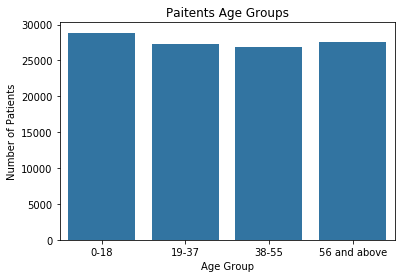

In [107]:
# age_group column
# plot a bar chart
sns.countplot(data = df, x = 'age_group', color = base_color)
plt.title('Paitents Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

>The age group between 19 and 37 exhibited a higher rate of missed appointments compared to other age groups. Conversely, individuals aged 56 and above demonstrated the highest level of commitment to attending their appointments. This trend suggests that older individuals are more likely to show up for their appointments. However, the age group between 0 and 18 did not conform to this pattern, which may be attributed to the presence of accompanying adults, particularly for children aged 0 to 15.
In conclusion, patient age appears to be a potentially valuable factor for predicting appointment attendance.

<a id='conclusions'></a>
## Conclusions

In this project, I conducted an analysis of the Medical Appointment No Shows Dataset utilizing Python libraries such as NumPy, pandas, Matplotlib, and seaborn. The dataset encompassed 110,527 appointments, revealing that approximately 20% of patients failed to attend their scheduled appointments

The following questions were addressed:

Q1: What is the distribution of appointment show-up vs. no show-up based on the day of the week the appointment was        scheduled?

>The distribution of appointment show-up vs. no show-up based on the day of the week the appointment was scheduled revealed that most appointments were scheduled for Tuesdays, followed by Wednesdays and Mondays. Thursdays had the lowest show-up rate, while Saturdays had no appointments scheduled.


Q2: How does the geographic distribution of neighborhoods impact the likelihood of patients showing up for their appointments?

>The geographic distribution of neighborhoods significantly impacted the likelihood of patients showing up for their appointments. Certain neighborhoods, such as JARDIM CAMBURI and MARIA ORTIZ, had higher attendance rates compared to others.


Q3: Is age a reliable factor for predicting whether a patient will attend their scheduled appointment?

>Age appears to be a reliable factor for predicting whether a patient will attend their scheduled appointment. Older individuals, particularly those aged 56 and above, demonstrated a higher commitment to showing up for their appointments. However, the age group between 0 and 18 exhibited a lower adherence rate, potentially influenced by the presence of accompanying adults, especially for younger children.


Limitation:
> It would have been more advantageous to encompass multiple countries in the analysis. Additionally, providing the appointment time could have been highly beneficial for a more comprehensive understanding.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])